In [2]:
import sys
import os
import nltk
from nltk.corpus import stopwords
import re
import collections
import numpy as np
import csv
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns

# 一、Part1 Of Lab1
### 1.1 Read a text file
- 文本数据为《baby I》的歌词

In [52]:
os.chdir("E:/graduate/class/applied_statistic_example_analysis/homework1")
f = open("Baby I - Ariana Grande.txt")
lyrics = f.readlines()
f.close()
print "".join(lyrics[:20])

Baby I got love for thee so deep inside of me

I don't know where to start

I love you more than anything

But the words cant even touch what's in my heart

When I try to explain it I be sounding insane

The words don't ever come out right

I get all tongue tied (and twisted)

I can't explain what I'm feeling

So I say baby baby baby

Baby I (ooh baby oh baby my baby)




### 1.2 Do the necessary cleaning

In [12]:
#去掉\n
lyrics1 = [line.split("\n")[0] for line in lyrics if line not in ["\n"]] 
#去掉非英文字符
lyric_seg = [re.sub(u'\W', "", i) for i in nltk.word_tokenize(" ".join(lyrics1))] 
#去除停用词+转化成小写+去掉字符少于3的词
filtered = [w.lower() for w in lyric_seg if w not in stopwords.words('english')] 
#去掉""
space_len = filtered.count("")
for i in range(space_len):
    filtered.remove("")
filtered[:10]

['baby', 'i', 'got', 'love', 'thee', 'deep', 'inside', 'i', 'nt', 'know']

### 1.3 Convert to other format

In [11]:
#词频统计,转化成矩阵
word_count = np.array(collections.Counter(filtered).most_common())
print word_count[:10]

[['baby' '48']
 ['i' '44']
 ['say' '13']
 ['ooh' '10']
 ['words' '9']
 ['try' '8']
 ['m' '7']
 ['complicate' '6']
 ['everytime' '6']
 ['nt' '5']]


### 1.4 Export to csv format

In [ ]:
csvfile = open('word_count.csv','w') 
writer = csv.writer(csvfile)
for row in word_count:
    writer.writerow([row[0], row[1]])
csvfile.close()

# 二、Part2 Of Lab1
### 2.1 Read a csv flie
- 数据为鸢尾花数据集

In [5]:
os.chdir("E:/graduate/class/applied_statistic_example_analysis/homework1")
csvfile = open("iris.csv")
csvReader = csv.reader(csvfile)
lines = []
for line in csvReader:
    lines.append(line)
csvfile.close()
lines[:10]

[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'],
 ['5.1', '3.5', '1.4', '0.2', 'setosa'],
 ['4.9', '3', '1.4', '0.2', 'setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'setosa'],
 ['5', '3.6', '1.4', '0.2', 'setosa'],
 ['5.4', '3.9', '1.7', '0.4', 'setosa'],
 ['4.6', '3.4', '1.4', '0.3', 'setosa'],
 ['5', '3.4', '1.5', '0.2', 'setosa'],
 ['4.4', '2.9', '1.4', '0.2', 'setosa']]

### 2.2 Do the description

In [15]:
X = [map(float,line[0:(len(line)-1)]) for line in lines[1:len(lines)]]
X_T = map(list,zip(*X)) #转置
Y = [line[len(line)-1] for line in lines[1:len(lines)]]
print ",".join(lines[0])+"的\n最大值："+str(max(X))+"\n最小值："+str(min(X))+"\n均值："+str(map(lambda a:sum(a)/len(a),X_T))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species的
最大值：[7.9, 3.8, 6.4, 2.0]
最小值：[4.3, 3.0, 1.1, 0.1]
均值：[5.843333333333335, 3.057333333333334, 3.7580000000000027, 1.199333333333334]


In [16]:
#统计各个类型数目
Y_count= {}
for i in Y:
    if Y.count(i)>1:
            Y_count[i] = Y.count(i)   
print Y_count

{'setosa': 50, 'versicolor': 50, 'virginica': 50}


### 2.3 Convert it to dataframe

In [17]:
data = pd.DataFrame(lines[1:len(lines)],columns = lines[0])
data.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa


### 2.4 Try some linear algebra 
- 矩阵转置、逆、行列式值

In [24]:
A = np.array(X)
XX = A.T.dot(A)
print "矩阵相乘：\n"+str(XX) #matrix multiplication
print "矩阵的逆：\n"+str(linalg.inv(XX)) # inverse of a matrix
print "行列式值：\n"+str(linalg.det(XX))

矩阵相乘：
[[ 5223.85  2673.43  3483.76  1128.14]
 [ 2673.43  1430.4   1674.3    531.89]
 [ 3483.76  1674.3   2582.71   869.11]
 [ 1128.14   531.89   869.11   302.33]]
矩阵的逆：
[[ 0.05034014 -0.0564344  -0.04649057  0.04508845]
 [-0.0564344   0.06736108  0.04506042 -0.03745986]
 [-0.04649057  0.04506042  0.06696879 -0.09831163]
 [ 0.04508845 -0.03745986 -0.09831163  0.18358105]]
行列式值：
123607466.998


- 最小二乘和广义逆

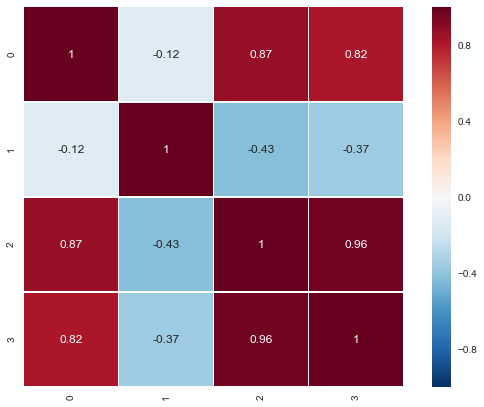

In [28]:
#查看相关图矩阵，找线性关系最强的两个变量做最小二乘估计
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(np.corrcoef(A.T), square=True, linewidths=.5, annot=True)
plt.show()

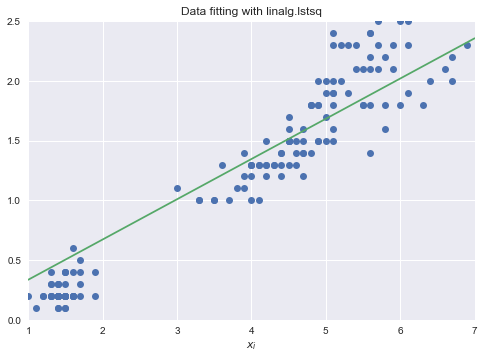

In [46]:
#最小二乘估计系数c
c, resid, rank, sigma = linalg.lstsq(A[:,2][:, np.newaxis],A[:,3][:, np.newaxis])
#拟合的回归曲线
xi2 = np.r_[1:7:100j].reshape(100,1)
yi2 = c*xi2
#OLS估计的拟合曲线与真实值散点图
plt.plot(A[:,2],A[:,3],"o",xi2,yi2)
plt.axis([1,7,0,2.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

- 特征值与特征向量

In [43]:
A = np.array(X)
XX = A.T.dot(A)
la,v = linalg.eig(XX)
l1,l2,l3,l4 = la
print "4个特征值："+str(l1)+str(l2)+str(l3)+str(l4)#eigenvalues
for i in range(4):
    print "第"+str(i+1)+"个特征向量是"+str(v[:,i])
print "每个特征向量的模为："+str(np.sum(abs(v**2),axis=0)) #eigenvectors are unitary
v1 = np.array(v[:,0]).T
print "矩阵乘以特征向量的值-特征值乘以特征向量的值="+str(linalg.norm(XX.dot(v1)-l1*v1)) #check the computation

4个特征值：(9208.30507031+0j)(315.454316577+0j)(11.9780429049+0j)(3.55257020348+0j)
第1个特征向量是[ 0.75110816  0.38008617  0.51300886  0.16790754]
第2个特征向量是[ 0.2841749   0.5467445  -0.70866455 -0.34367081]
第3个特征向量是[ 0.50215472 -0.67524332 -0.05916621 -0.53701625]
第4个特征向量是[ 0.32081425 -0.31725607 -0.48074507  0.75187165]
每个特征向量的模为：[ 1.  1.  1.  1.]
矩阵乘以特征向量的值-特征值乘以特征向量的值=9.10630860494e-12
